In [ ]:
# 【影像表達色彩的方式如下】
# 一、16色 2^4
# 二、256色 2^8 (GrayScale)
# 三、65536色 (Hi-Color) 2^16 (R(5)、G(5)、B(6))
# 四、16777216 (True Color) 2^24 (R、G、B各占8位元)

In [5]:
import cv2
#第二參數為讀入參數(0：灰階方式；1：彩色)
img = cv2.imread(r'1122_CV_Images/Shohei_2023_Dodgers_0001.jpg', -1)
print(f'此影像的shape為：{img.shape}')
print(f'此影像的size為：{img.size}')
print(f'此影像的dtype為：{img.dtype}')

此影像的shape為：(159, 318, 3)
此影像的size為：151686
此影像的dtype為：uint8


In [ ]:
# 【色彩空間定義釐清】
# 傳統上、matplotlib都是R、G、B
# 在Openvcv上是B、G、R

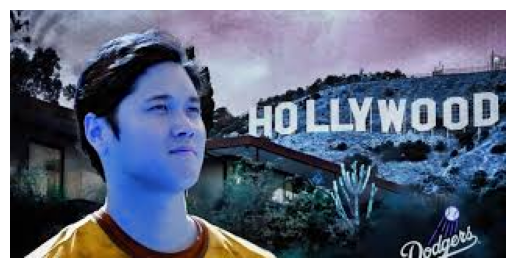

In [10]:
import cv2
import numpy as np
#利用matplotlib來顯示圖片
import matplotlib.pyplot as plt

#讀取圖像
img = cv2.imread(r'1122_CV_Images/Shohei_2023_Dodgers_0001.jpg')

#顯示圖像
plt.imshow(img)

#關閉坐標軸
plt.axis('off')
plt.show()

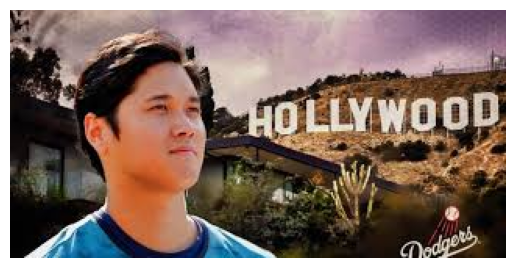

In [9]:
# 【修改後】
import cv2
import numpy as np
#利用matplotlib來顯示圖片
import matplotlib.pyplot as plt

#讀取圖像
img = cv2.imread(r'1122_CV_Images/Shohei_2023_Dodgers_0001.jpg')

#顯示圖像，格式轉換
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

#關閉坐標軸
plt.axis('off')
plt.show()

In [13]:
# 【把彩色影像轉換成灰階，並且儲存】

import cv2

# 讀取圖像
img = cv2.imread(r'1122_CV_Images/Shohei_2023_Dodgers_0001.jpg')

# 轉換成灰階影像
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

# 儲存灰階影像
cv2.imwrite('1122_CV_Images/Shohei_2023_Dodgers_0001_Gray.jpg',img)

# 按下任意鍵停止
cv2.waitKey(0)

# 摧毀所有視窗
cv2.destroyAllWindows()

In [ ]:
# 【讀取圖形中單點顏色值】

import cv2
import time

# 讀取圖像
img = cv2.imread(r'1122_CV_Images/Shohei_2023_Dodgers_0001.jpg')

# 取個標題
title = "Shohei Ohtani"
cv2.namedWindow(title, cv2.WINDOW_NORMAL)

# 轉換成灰階影像
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def mouse_click(event, x, y, flags, param):
    if event == cv2.EVENT_MOUSEMOVE:
        time1 = time.perf_counter()

        img1 = img.copy()
        print("需時間：", time.perf_counter() - time1)

        # 顯示灰階值和 RGB 值
        cv2.putText(img1, "Gray: " + str(gray[y, x]), (10, 30), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2)
        cv2.putText(img1, "RGB: " + str(img[y, x]), (10, 70), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2)
        
        cv2.imshow(title, img1)

# 設置鼠標回調函數
cv2.setMouseCallback(title, mouse_click)

# 按下任意鍵停止
cv2.waitKey(0)

# 摧毀所有視窗
cv2.destroyAllWindows()

In [24]:
# 【色彩空間轉換001：彩色轉灰階】
import cv2

# 讀取圖像
img = cv2.imread(r'1122_CV_Images/Shohei_2023_Dodgers_0001.jpg',-1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 圖像顯示
cv2.imshow("rgb", img)
cv2.imshow("gray", gray)
cv2.waitKey()
cv2.destroyAllWindows()

In [25]:
# 【色彩空間轉換002：RGB可以轉成灰階，但是不可逆】
# 不可逆的理由是：不可能由灰階反算回去原始的RGB影像，如果可以，那也是運氣好
import cv2

# 讀取圖像
img = cv2.imread(r'1122_CV_Images/Shohei_2023_Dodgers_0001.jpg',0)
bgr = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# 圖像顯示
cv2.imshow("gray", img)
cv2.imshow("rbg", bgr)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
# HSV說明如下
# H：代表色調，也就是紅、黃、藍，用來描述純色
# S：代表飽和度，與白光疊加後的描述
# V：代表亮度

# HSV的使用情境：當在物件辨識時，如果在彩色的影像當中，想要挑選特定特別顏色，例如：在五顏六色的水果籃挑出橘色的橘子。
# 上述的例子，用RGB就做不到，要用HSV

In [ ]:
import cv2

# 讀取圖像
image = cv2.imread(r'1122_CV_Images/Shohei_2023_Dodgers_0002.jpg')
# 把RGB轉換成HSV
hsv=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

# 圖像顯示
cv2.imshow("Input", image)
cv2.imshow("Result", hsv)
cv2.waitKey(0)


In [1]:
# 抓出藍色的物件，指令是：inRange()，等同於是遮罩，但單位是灰階值

import cv2
import numpy as np

# 讀取圖像
image = cv2.imread(r'1122_CV_Images/Shohei_2023_Dodgers_0002.jpg')

# 把RGB轉換成HSV
hsv=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

# 藍色下限：100、43、46
lower_blue = np.array([100, 43, 46])

# 藍色上限：124、255、255
upper_blue = np.array([124, 255, 255])

mask = cv2.inRange(hsv, lower_blue, upper_blue)
res = cv2.bitwise_and(image, image, mask=mask)

cv2.imshow('Input', image)
cv2.imshow('Result', res)
cv2.waitKey(0)

-1